In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

Importing train, test and validation dataset

In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [5]:
train.head()

,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City_Lekki,City_Ajah,City_Yaba,City_Ikoyi,...,Neighborhood_Oworonshoki,Neighborhood_Awolowo Road,Neighborhood_1004,Property Type_Self-contained,Property Type_Fully Detached Duplex,Property Type_Flat,Property Type_Apartment,Property Type_Terraced Duplex,Property Type_Semi Detached Duplex,Price
0,0,0,0,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1000000.0
1,0,1,1,4,5,6,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2500000.0
2,0,0,0,3,2,3,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1800000.0
3,1,0,0,3,3,4,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5000000.0
4,0,0,0,2,2,3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,2500000.0


In [6]:
train.shape, test.shape

((36716, 91), (9179, 10))

In [8]:
cv = KFold(n_splits=4, shuffle=True, random_state=51)

In [13]:
dataset = Dataset(df=train, target="Price", features=[col for col in train.columns if col != "Price"])

In [19]:
lofo = LOFOImportance(dataset, cv=cv, scoring="neg_mean_absolute_error",)

In [20]:
# get the mean and standard deviation of the importances in pandas format
importance_df = lofo.get_importance()

  0%|          | 0/90 [00:00<?, ?it/s]

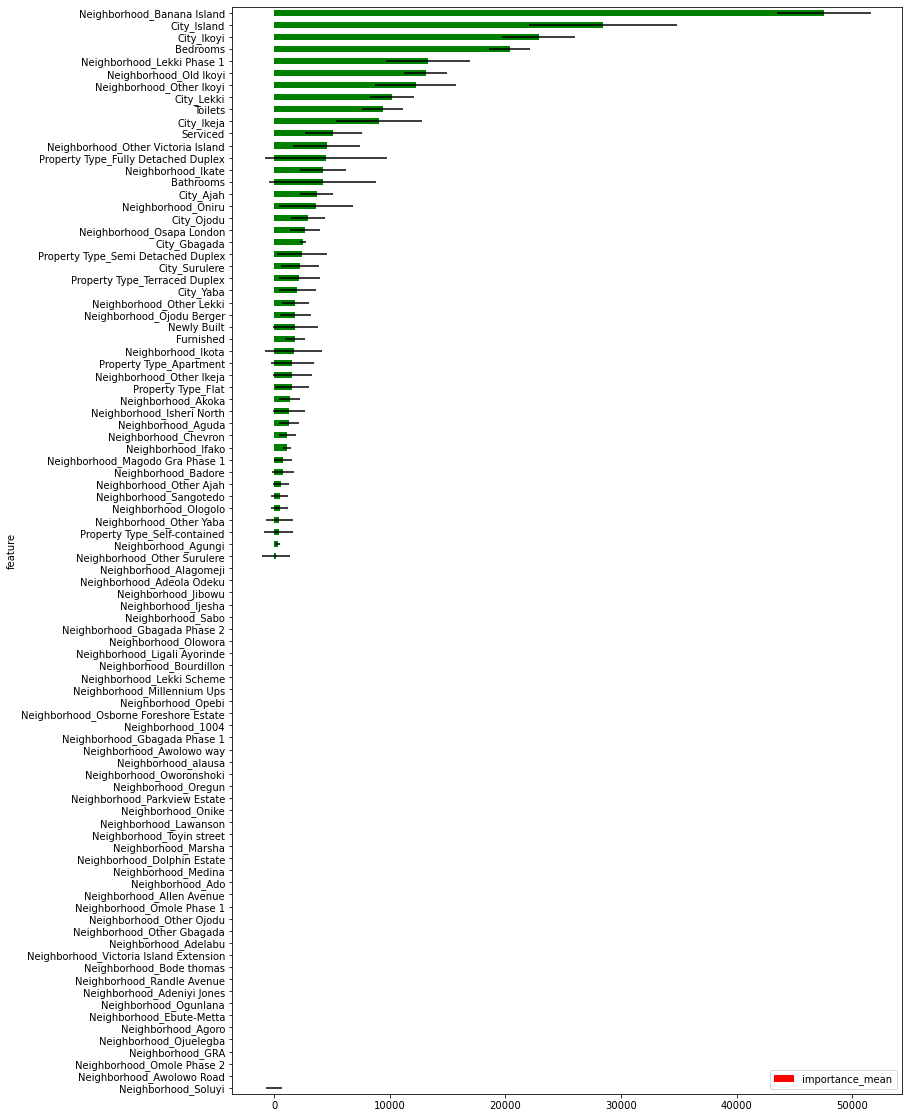

In [21]:
# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))